In [67]:
import pandas as pd
import nltk

**Remove URL**

In [68]:
import re
def remove_urls(text):
  if text is None:
    return ''
  return re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,4}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)', '', text, flags=re.MULTILINE)

In [69]:
remove_urls('https://ftp.mozilla.org/pub/mozilla.org/labs/fxos-simulator/index.json is not a valid JSON file')

' is not a valid JSON file'

**Removal of Punctuations**

In [70]:
import string
PUNCT_TO_REMOVE = string.punctuation
PUNCT_TO_REMOVE = PUNCT_TO_REMOVE.replace('.','')
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))


**Remove Newline and Extra Space**

In [71]:
def remove_newline_and_extra_space(text):
  text = text.replace('\n', ' ')
  text = text.replace('\r', ' ')
  text = text.replace('\t', ' ')
  return re.sub(' +', ' ', text)

**Remove HTML tags**

In [72]:
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

**Remove Hex**

In [73]:
import re

In [74]:
def remove_hex(text):
    text = text.replace('\u00ff', ' ')
    return text

## Remove Stack Trace

In [75]:
def remove_stack_trace(text):
    start_loc = text.find("stack trace:")
    text = text[:start_loc]  
    return text

## Count Words

In [76]:
def count_words(text):
    words = text.split()
    return len(words)

## Remove Numbers

In [77]:
def remove_numbers(text):
    return re.sub(r'\d', '', text)

## Remove Single Char

In [78]:
def remove_single_char(text):
    words = text.split()
    words = [w for w in words if len(w) > 1]
    return " ".join(words)

## Truncate

In [79]:
def truncate_text(text, max_words):
    words = text.split()
    if len(words) > max_words:
        words = words[0:max_words]
        return " ".join(words)
    return text

## Data Preprocessing

In [80]:
import json
import regex as rx

In [81]:
with open('deep_data.json', mode='r', encoding='utf-8-sig') as f:
    text = f.read()
    data = json.loads(text, strict=False)

In [82]:
df = pd.DataFrame(data, columns=data[0].keys())

In [83]:
df.head()

,owner,issue_title,description
0,nobody@mozilla.org,Dialup properties needs to be exposed in prefs,The dialup properties of the profile should be...
1,nobody@mozilla.org,[Find] Find whole word only,"Please add ""Match Whole Word Only"" option to b..."
2,nobody@mozilla.org,Plug-In Manager (ui for choosing mimetype-plug...,I would really like a plug-in manager for my b...
3,nobody@mozilla.org,add font-list support to the font pref front end,Subject: Re: font selection interface\nFrom: J...
4,nobody@mozilla.org,Ctrl-Alt-T to show networking debug info,"This is a 4.x farity feature request, it is us..."


In [84]:
df.rename(columns={"owner": "Assignee", "issue_title": "Summary", "description": "Description"}, inplace=True)

In [85]:
df = df[df['Assignee'] != '']

In [86]:
df.head()

,Assignee,Summary,Description
0,nobody@mozilla.org,Dialup properties needs to be exposed in prefs,The dialup properties of the profile should be...
1,nobody@mozilla.org,[Find] Find whole word only,"Please add ""Match Whole Word Only"" option to b..."
2,nobody@mozilla.org,Plug-In Manager (ui for choosing mimetype-plug...,I would really like a plug-in manager for my b...
3,nobody@mozilla.org,add font-list support to the font pref front end,Subject: Re: font selection interface\nFrom: J...
4,nobody@mozilla.org,Ctrl-Alt-T to show networking debug info,"This is a 4.x farity feature request, it is us..."


In [87]:
df['Description'].fillna('', inplace=True)
df['Summary'].fillna('', inplace=True)
df['text'] = df['Summary'].astype(str) + '. ' + df['Description'].astype(str)

In [88]:
df['text'] = df['text'].str.lower()
df['text'] = df['text'].apply(lambda text: remove_urls(text))
df['text'] = df['text'].apply(lambda text: remove_punctuation(text))
df['text'] = df['text'].apply(lambda text: remove_hex(text))
df['text'] = df['text'].apply(lambda text: remove_newline_and_extra_space(text))
df['text'] = df['text'].apply(lambda text: remove_stack_trace(text))
df['text'] = df['text'].apply(lambda text: remove_numbers(text))
df['text'] = df['text'].apply(remove_single_char)
#df['text'] = df['text'].apply(lambda text: truncate_text(text, 1000))

In [89]:
df['words'] = df['text'].apply(count_words)

In [92]:
df = df[df['words'] >= 5]

In [93]:
import seaborn as sb

In [28]:
import matplotlib.pyplot as plt

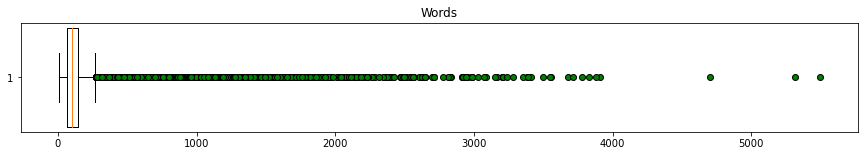

In [119]:
green_diamond = dict(markerfacecolor='g', marker='o')
fig1, ax1 = plt.subplots(figsize=(15, 2))
ax1.set_title('Words')
ax1.boxplot(df['words'], vert=False, whis=1.5, flierprops=green_diamond, widths=2.5)
plt.show()
fig1.savefig('word distribution1.pdf', dpi=300)

In [50]:
size = 10
df = df.groupby(by='Assignee')
df = df.filter(lambda x: len(x) >= size)

In [96]:
print(f'min words = {df["words"].min()}')
print(f'max words = {df["words"].max()}')
print(f'median words = {df["words"].median()}')

min words = 5
max words = 1000
median words = 99.0


In [98]:
df.to_csv('../Dataset/mozilla_firefox.csv', index=False)

In [100]:
def balance(seq):
    from collections import Counter
    from numpy import log
    
    n = len(seq)
    classes = [(clas,float(count)) for clas,count in Counter(seq).items()]
    k = len(classes)
    
    H = -sum([ (count/n) * log((count/n)) for clas,count in classes]) #shannon entropy
    return H/log(k)

In [101]:
balance(df['Assignee'].values)

0.143803036649494